In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Times New Roman',] # windows->Heiti TC
plt.rcParams['axes.unicode_minus'] = False # windows->simhei
plt.rcParams['figure.dpi'] = 200

import geopandas as gpd
import shapely
from shapely.geometry import Point,Polygon,LineString,MultiLineString,MultiPoint,MultiPolygon

import pickle
from tqdm import tqdm
from glob import glob
import joblib

# import northarrow
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [2]:
import os

import platform
if platform.system() == "Windows":
    os.chdir(r'H:\BaiduSyncdisk\DR.MENG-Full\Y2024-002-DT-NANJING-ACCESSIBILITY-MAUP')
else:
    os.chdir(r'/Volumes/SANDISK/DR.MENG')

In [3]:
parks = gpd.read_file('./parks/parks.shp')

In [4]:
# parks

In [5]:
buildings = gpd.read_file(r"./od_request_data_buildings/buildings_with_id.geojson")

In [6]:
buildings

,floors,building_id,geometry
0,2.0,b_0,"POLYGON ((118.72926 31.99482, 118.72953 31.994..."
1,2.0,b_1,"POLYGON ((118.72762 31.99548, 118.72758 31.995..."
2,2.0,b_2,"POLYGON ((118.72758 31.99552, 118.72762 31.995..."
3,2.0,b_3,"POLYGON ((118.72744 31.9957, 118.7275 31.99564..."
4,2.0,b_4,"POLYGON ((118.72751 31.99613, 118.72747 31.996..."
...,...,...,...
139986,20.0,b_139986,"POLYGON ((118.8248 31.90135, 118.8248 31.90118..."
139987,20.0,b_139987,"POLYGON ((118.82475 31.90083, 118.82475 31.900..."
139988,20.0,b_139988,"POLYGON ((118.82389 31.90074, 118.82389 31.900..."
139989,20.0,b_139989,"POLYGON ((118.82394 31.90022, 118.82394 31.900..."


# GRID LEVEL

In [7]:
grid_names = [
    'grid250',
    'grid500',
    'grid1000',
    'grid1500',
    'grid2000',
    'grid2500',
    'grid3000',
    'community',
    'buildings',
]

trans_types = [
    'walk',
    'cycle',
    'pt',
    'nav'
]
time_thresholds = [
    900,
    1800
]

In [8]:
grid = grid_names[2]
trans = trans_types[2]
threshold = time_thresholds[1]

In [9]:
file_path = f'./data_access_geojson/od_{trans}_{grid}_od_{threshold}.geojson'
file_path

'./data_access_geojson/od_pt_grid1000_od_1800.geojson'

In [10]:
# file_path = f'./data_access_shp/od_walk_buildings_900.shp'
# file_path

In [11]:
data = gpd.read_file(file_path)

In [12]:
data

,net_id,Id,access_val,geometry
0,g_3114,south,0.0,"POLYGON ((118.77399 31.86959, 118.77474 31.878..."
1,g_3115,south,0.0,"POLYGON ((118.78446 31.86894, 118.78522 31.877..."
2,g_3116,south,0.0,"POLYGON ((118.79494 31.8683, 118.79569 31.8772..."
3,g_3117,south,0.0,"POLYGON ((118.80541 31.86765, 118.80617 31.876..."
4,g_3157,south,0.0,"POLYGON ((118.75379 31.87982, 118.75454 31.888..."
...,...,...,...,...
960,g_6135,north,0.0,"POLYGON ((118.73237 32.24955, 118.73313 32.258..."
961,g_6136,north,0.0,"POLYGON ((118.74289 32.2489, 118.74365 32.2578..."
962,g_6137,north,0.0,"POLYGON ((118.75341 32.24825, 118.75417 32.257..."
963,g_6177,north,0.0,"POLYGON ((118.74365 32.25784, 118.74442 32.266..."


In [13]:
data_sl = data[(data['access_val'] <= data['access_val'].quantile(0.95)) &\
               (data['access_val'] >= data['access_val'].quantile(0.05))]

In [14]:
data_sl

,net_id,Id,access_val,geometry
0,g_3114,south,0.0,"POLYGON ((118.77399 31.86959, 118.77474 31.878..."
1,g_3115,south,0.0,"POLYGON ((118.78446 31.86894, 118.78522 31.877..."
2,g_3116,south,0.0,"POLYGON ((118.79494 31.8683, 118.79569 31.8772..."
3,g_3117,south,0.0,"POLYGON ((118.80541 31.86765, 118.80617 31.876..."
4,g_3157,south,0.0,"POLYGON ((118.75379 31.87982, 118.75454 31.888..."
...,...,...,...,...
960,g_6135,north,0.0,"POLYGON ((118.73237 32.24955, 118.73313 32.258..."
961,g_6136,north,0.0,"POLYGON ((118.74289 32.2489, 118.74365 32.2578..."
962,g_6137,north,0.0,"POLYGON ((118.75341 32.24825, 118.75417 32.257..."
963,g_6177,north,0.0,"POLYGON ((118.74365 32.25784, 118.74442 32.266..."


In [15]:
import mapclassify

In [16]:
mapclassify.NaturalBreaks(data_sl['access_val'])

NaturalBreaks

   Interval      Count
----------------------
[ 0.00,  4.37] |   722
( 4.37, 14.24] |   107
(14.24, 29.22] |    44
(29.22, 48.62] |    23
(48.62, 76.13] |    20

In [17]:
res = gpd.sjoin(data_sl, parks, predicate='within')
data_sl = data_sl[~data_sl['net_id'].isin(res['net_id'])]

In [18]:
data_sl

,net_id,Id,access_val,geometry
0,g_3114,south,0.0,"POLYGON ((118.77399 31.86959, 118.77474 31.878..."
1,g_3115,south,0.0,"POLYGON ((118.78446 31.86894, 118.78522 31.877..."
2,g_3116,south,0.0,"POLYGON ((118.79494 31.8683, 118.79569 31.8772..."
3,g_3117,south,0.0,"POLYGON ((118.80541 31.86765, 118.80617 31.876..."
4,g_3157,south,0.0,"POLYGON ((118.75379 31.87982, 118.75454 31.888..."
...,...,...,...,...
960,g_6135,north,0.0,"POLYGON ((118.73237 32.24955, 118.73313 32.258..."
961,g_6136,north,0.0,"POLYGON ((118.74289 32.2489, 118.74365 32.2578..."
962,g_6137,north,0.0,"POLYGON ((118.75341 32.24825, 118.75417 32.257..."
963,g_6177,north,0.0,"POLYGON ((118.74365 32.25784, 118.74442 32.266..."


In [19]:
res = gpd.sjoin(data_sl, buildings, predicate='contains')

In [20]:
res

,net_id,Id,access_val,geometry,index_right,floors,building_id
8,g_3161,south,0.0,"POLYGON ((118.79569 31.87724, 118.79645 31.886...",126424,6.0,b_126424
8,g_3161,south,0.0,"POLYGON ((118.79569 31.87724, 118.79645 31.886...",126426,6.0,b_126426
8,g_3161,south,0.0,"POLYGON ((118.79569 31.87724, 118.79645 31.886...",126421,6.0,b_126421
8,g_3161,south,0.0,"POLYGON ((118.79569 31.87724, 118.79645 31.886...",126427,6.0,b_126427
8,g_3161,south,0.0,"POLYGON ((118.79569 31.87724, 118.79645 31.886...",126420,6.0,b_126420
...,...,...,...,...,...,...,...
961,g_6136,north,0.0,"POLYGON ((118.74289 32.2489, 118.74365 32.2578...",54351,2.0,b_54351
961,g_6136,north,0.0,"POLYGON ((118.74289 32.2489, 118.74365 32.2578...",54354,20.0,b_54354
962,g_6137,north,0.0,"POLYGON ((118.75341 32.24825, 118.75417 32.257...",72755,6.0,b_72755
962,g_6137,north,0.0,"POLYGON ((118.75341 32.24825, 118.75417 32.257...",72754,6.0,b_72754


In [21]:
data_s2 = data_sl[data_sl['net_id'].isin(res['net_id'])]

In [22]:
data_s2

,net_id,Id,access_val,geometry
8,g_3161,south,0.000000,"POLYGON ((118.79569 31.87724, 118.79645 31.886..."
9,g_3162,south,0.000000,"POLYGON ((118.80617 31.87659, 118.80693 31.885..."
26,g_3255,south,0.000000,"POLYGON ((118.80769 31.89447, 118.80844 31.903..."
27,g_3256,south,1.043759,"POLYGON ((118.81816 31.89382, 118.81892 31.902..."
33,g_3297,south,67.638296,"POLYGON ((118.77701 31.90534, 118.77777 31.914..."
...,...,...,...,...
957,g_6098,north,0.484653,"POLYGON ((118.76316 32.23866, 118.76393 32.247..."
959,g_6134,north,0.000000,"POLYGON ((118.72185 32.2502, 118.72261 32.2591..."
960,g_6135,north,0.000000,"POLYGON ((118.73237 32.24955, 118.73313 32.258..."
961,g_6136,north,0.000000,"POLYGON ((118.74289 32.2489, 118.74365 32.2578..."


<Axes: >

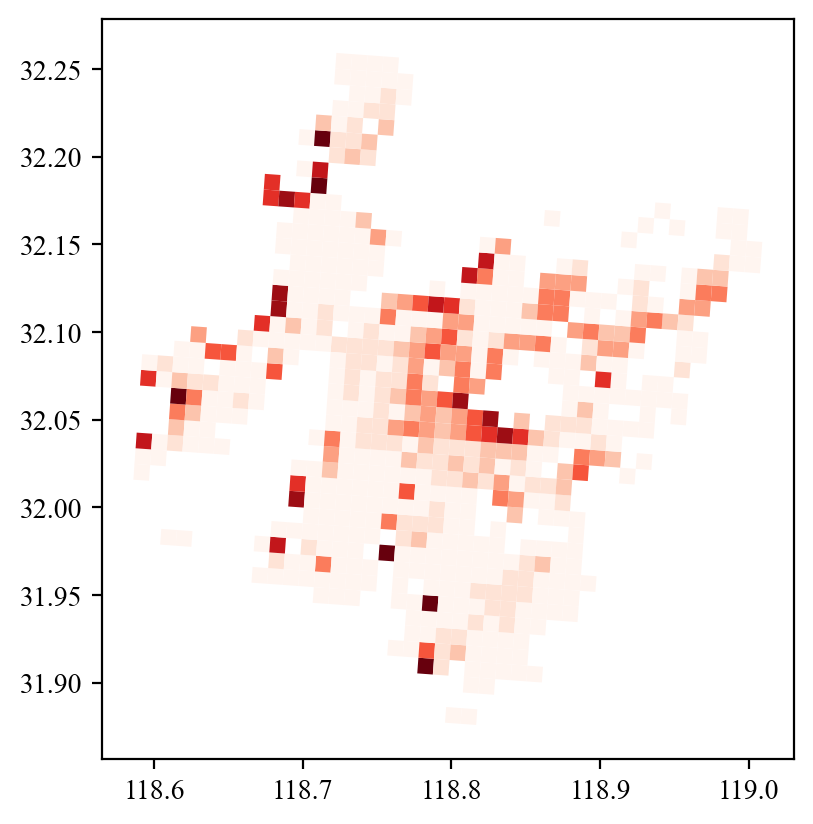

In [23]:
data_s2.plot(column='access_val', k=10, scheme='naturalbreaks', cmap='Reds')

In [24]:
colors = ['#D3D3D3',] + sns.color_palette('Reds',9)

In [25]:
rg_2 = [i for i in range(2,12,2)]
rg_2

[2, 4, 6, 8, 10]

In [26]:
colors

['#D3D3D3',
 (0.9969242599000384, 0.8961937716262975, 0.8489042675893886),
 (0.9913725490196079, 0.7913725490196079, 0.7082352941176471),
 (0.9882352941176471, 0.6715417147251057, 0.5605382545174933),
 (0.9874509803921568, 0.5411764705882353, 0.41568627450980394),
 (0.9835755478662053, 0.4127950788158401, 0.28835063437139563),
 (0.9466666666666667, 0.26823529411764707, 0.19607843137254902),
 (0.8503344867358708, 0.14686658977316416, 0.13633217993079583),
 (0.7364705882352941, 0.08, 0.10117647058823528),
 (0.5946174548250673, 0.04613610149942329, 0.07558631295655516)]

In [27]:
cmap = LinearSegmentedColormap.from_list('mycmap', colors)

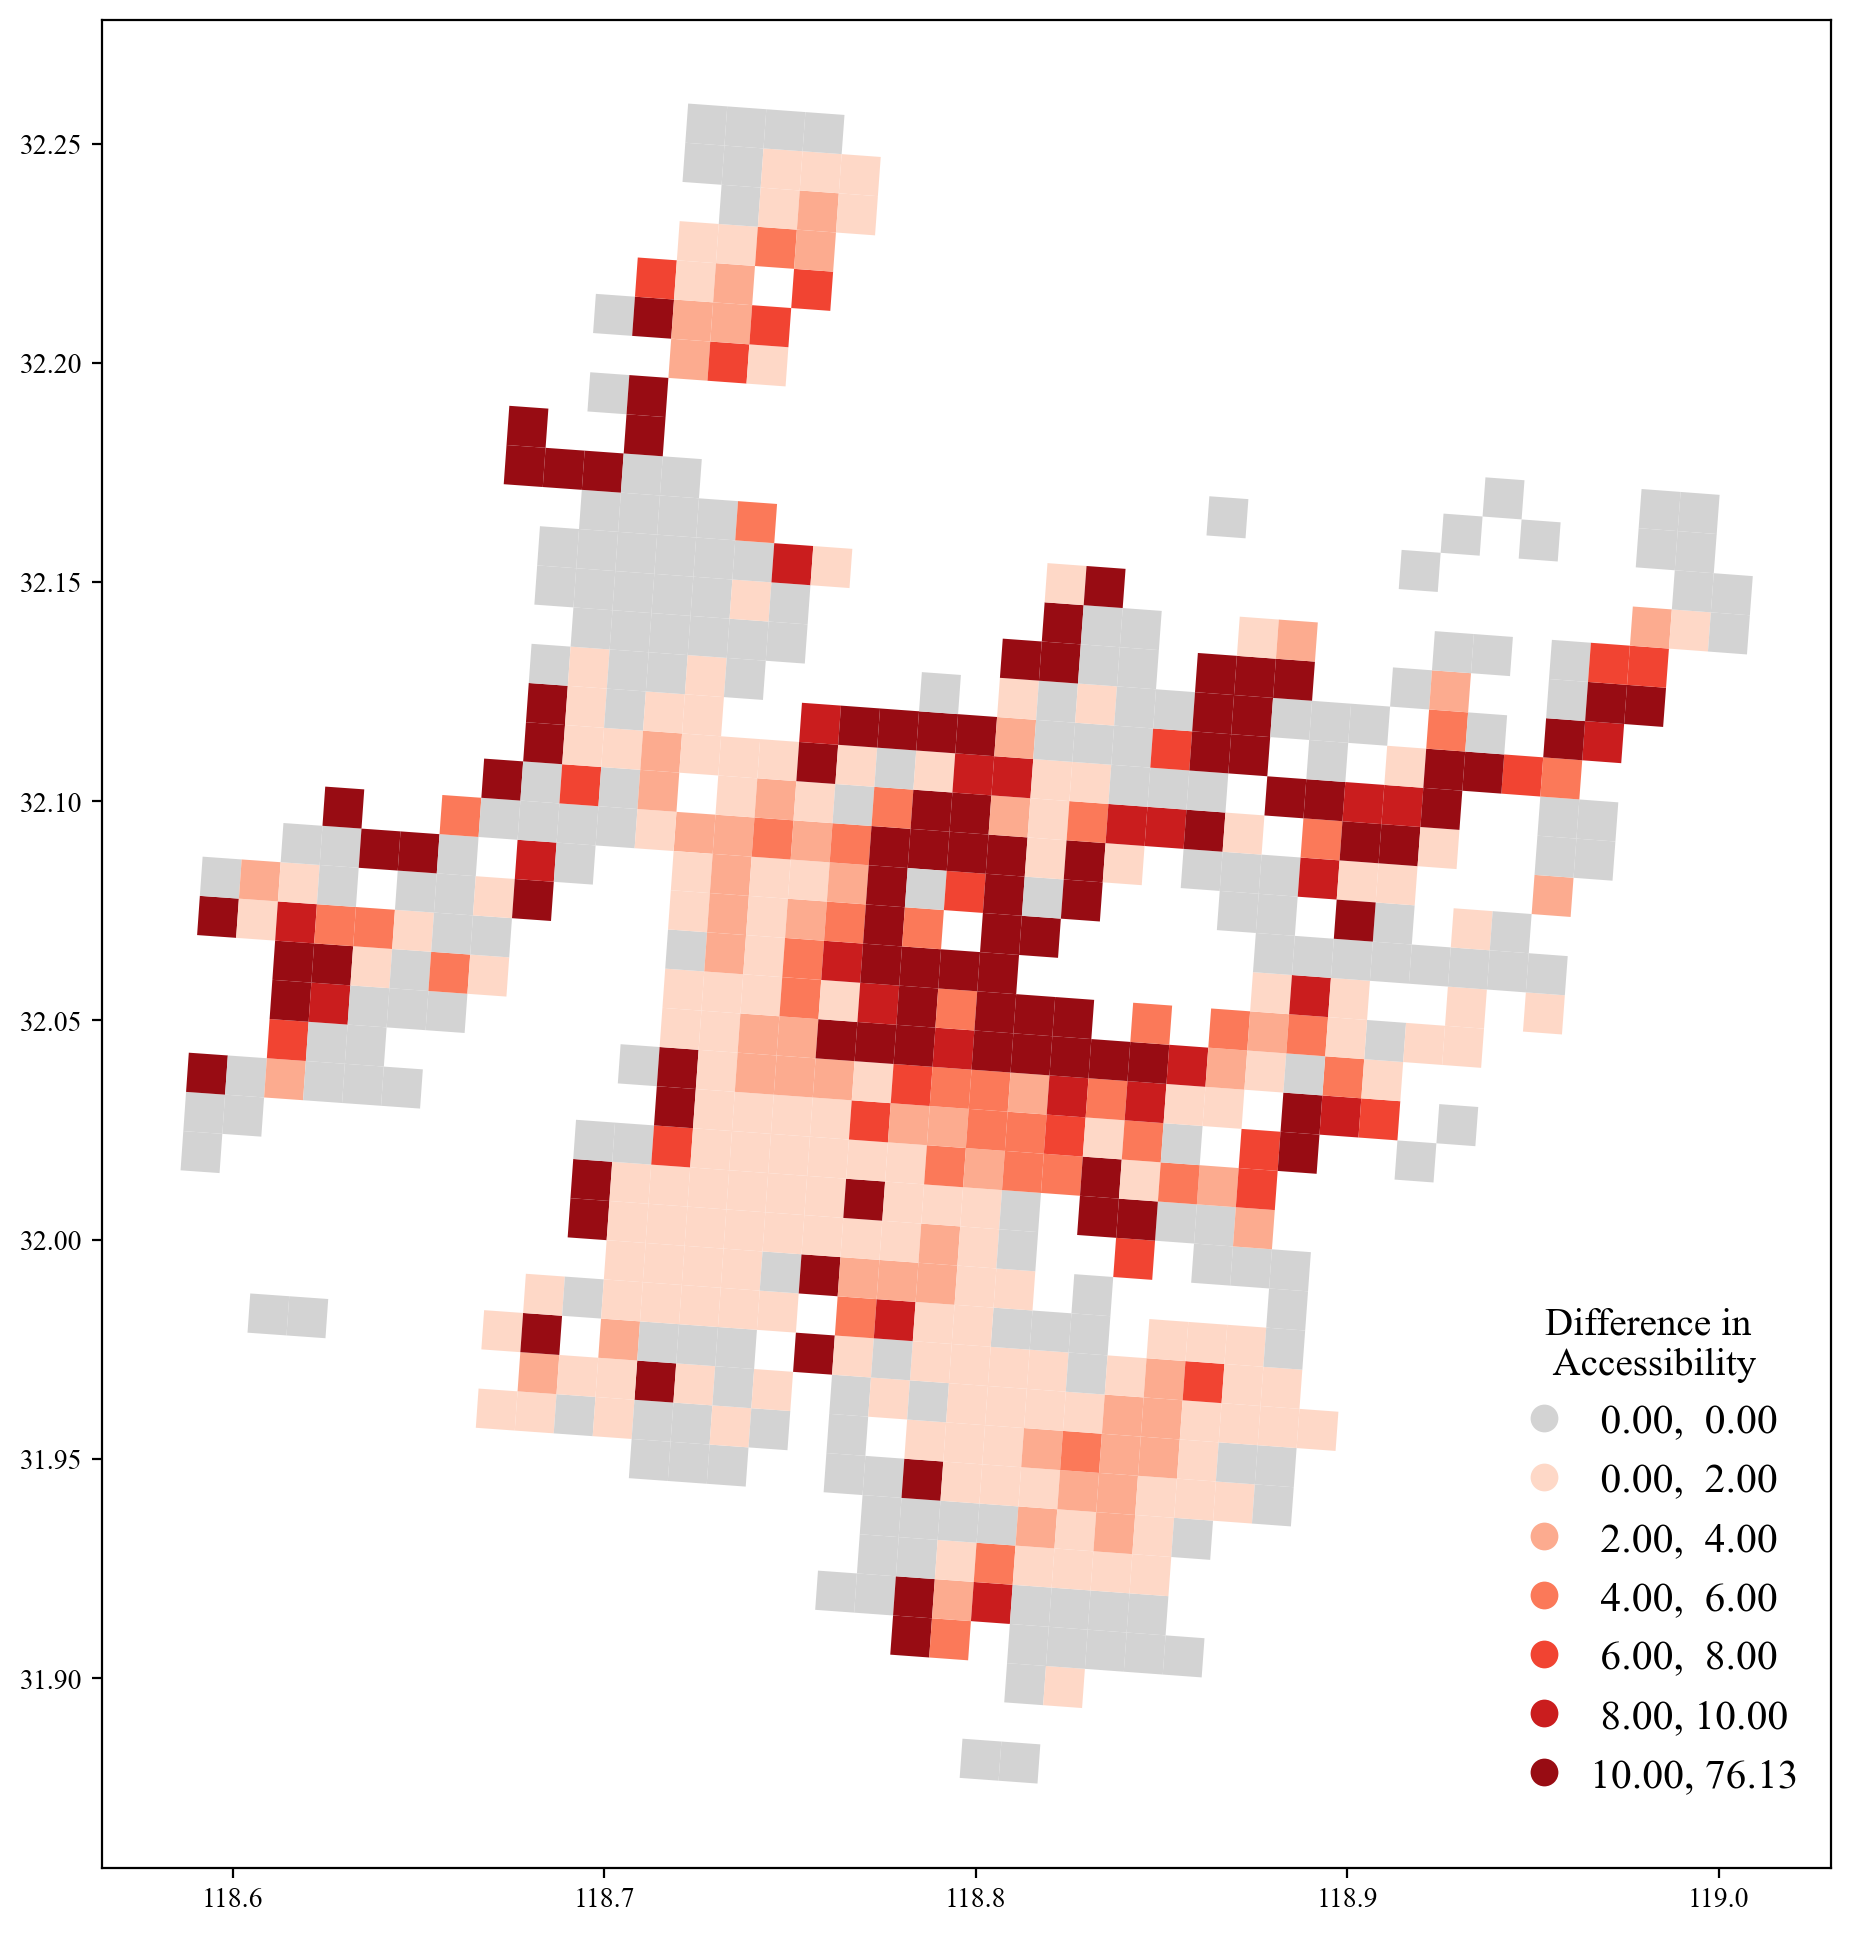

In [28]:
f, ax = plt.subplots(figsize=(12, 12))
bins = [0.001] + rg_2
fg = data_s2.plot(column='access_val', scheme="userdefined",
                edgecolor='none', cmap=cmap, ax=ax, legend=True,
                legend_kwds={'loc': (0.8,0.03), 'frameon': False, 'title': 'Difference in\n Accessibility', 'title_fontsize':14, 
                             'fontsize': 15, 'handletextpad': 0.1},
                classification_kwds={'bins': bins})


In [29]:
import contextily as cx

crs_epsg = 32649
nanjing = gpd.read_file('./shp/use_bounds/nanjing_town.shp')
center = gpd.read_file('./shp/central/nanjing_central.shp')

nanjingx = nanjing.to_crs(crs_epsg)
centerx = center.to_crs(crs_epsg)
data_s2 = data_s2.to_crs(crs_epsg)
parks = parks.to_crs(crs_epsg)

Text(0.0, 1.0, 'pt_grid1000_1800\n')

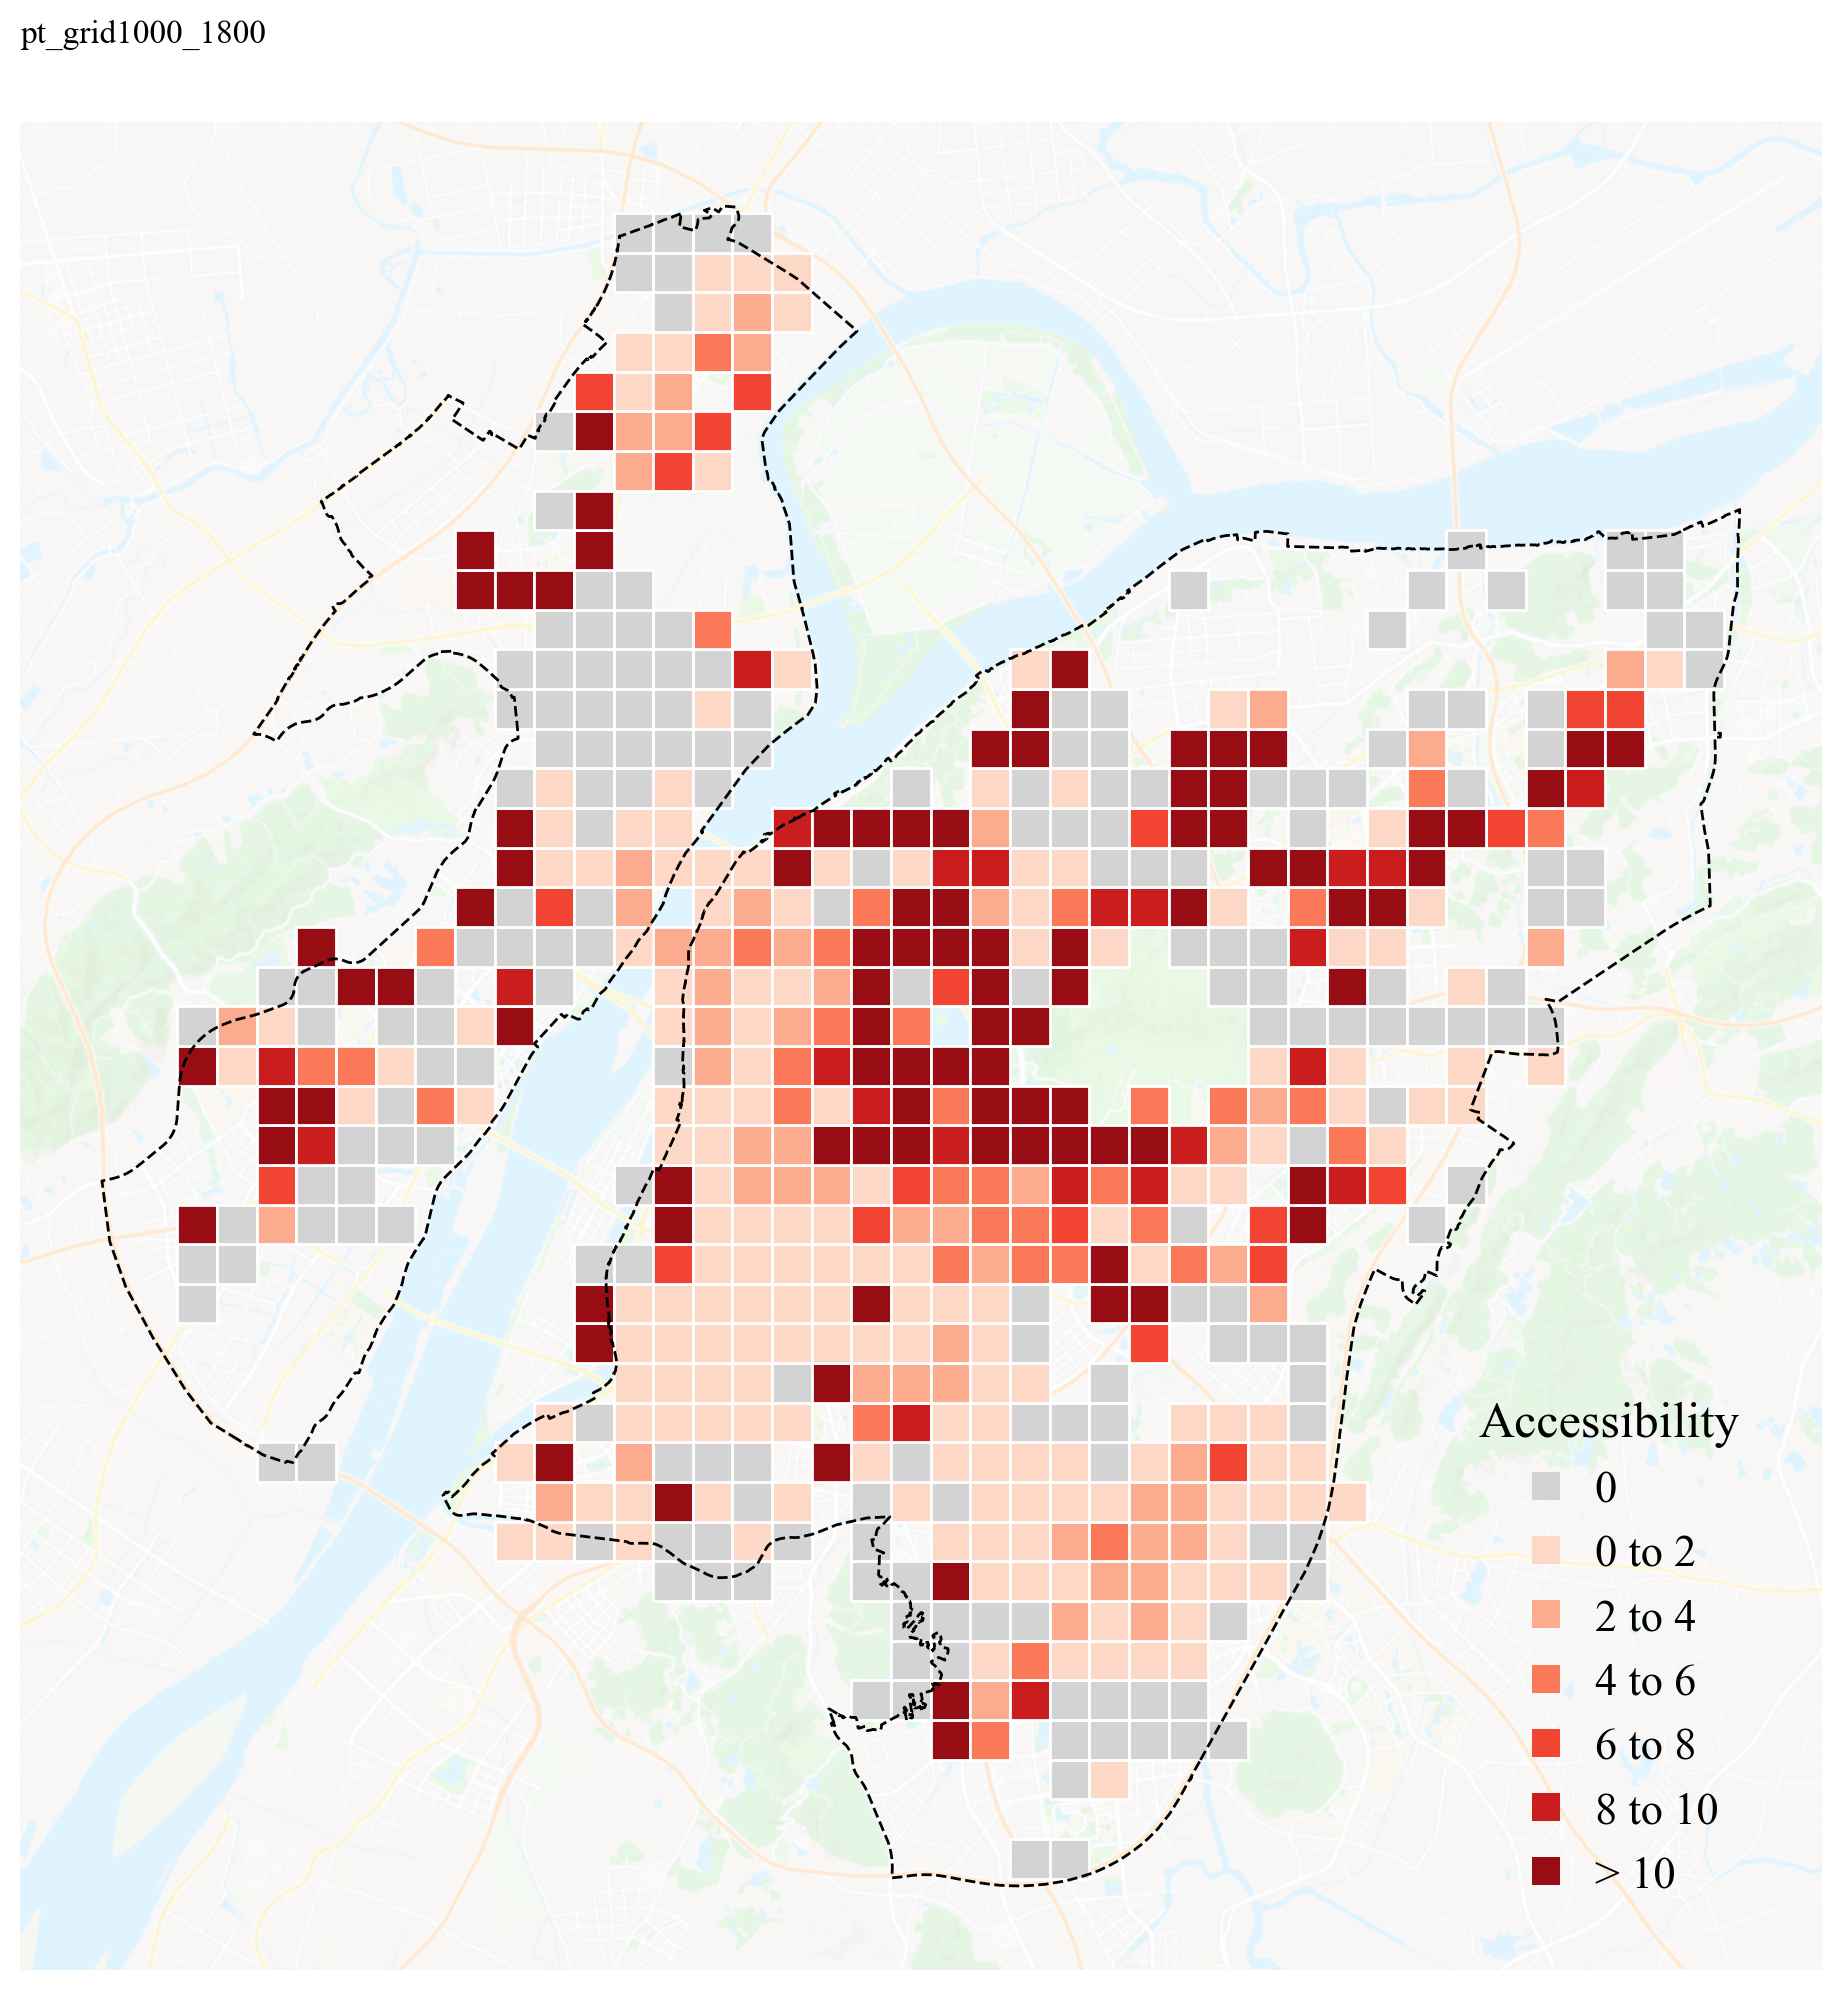

In [30]:
colors = ['#D3D3D3',] + sns.color_palette('Reds',9)
rg_2 = [i for i in range(2,12,2)]
cmap = LinearSegmentedColormap.from_list('mycmap', colors)


f, ax = plt.subplots(figsize=(12, 12))
bins = [0.001] + rg_2
fg = data_s2.plot(column='access_val', scheme="userdefined",
                edgecolor='white', cmap=cmap, ax=ax, legend=True,lw=1,
                legend_kwds={'loc': (0.8,0.03), 'frameon': False, 'title': 'Accessibility', 'title_fontsize':18, 
                             'fontsize': 16, 'handletextpad': 0.1},
                classification_kwds={'bins': bins})


leg = fg.get_legend()

num_len = len(leg.get_texts())
for i, lbl in enumerate(leg.get_texts()):
    label_text = lbl.get_text()
    lower = label_text.split(',')[0].strip()
    upper = label_text.split(',')[1].strip()

    f_lower = float(lower)
    f_upper = float(upper)

    if i == 0:
        new_text = f'0'
        lbl.set_text(new_text)
    elif i== num_len-1:
        new_text = f'> {bins[-1]}'
        lbl.set_text(new_text)
    else:
        f_lower = int(f_lower)
        f_upper = int(f_upper)

        new_text = f'{f_lower} to {f_upper}'
        lbl.set_text(new_text)


lines = leg.get_lines()
for line in lines:
    line.set_marker('s')  # 's' 表示正方形

centerx2 = centerx.copy()
centerx2['geometry'] = centerx2['geometry'].buffer(0.008)
centerx2.plot(ax=ax, lw=0, facecolor='none')

cx.add_basemap(ax, crs=centerx2.crs, alpha=0.3,
               source=cx.providers.MapBox.Streets, zorder=0)

centerx.plot(ax=ax, facecolor='none', edgecolor='k', lw=1, zorder=12, ls='--')
ax.tick_params(axis='both', which='major', length=5, color='k',labelsize=20)
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))  # 这里设置间隔为0.1
# ax.xaxis.set_major_locator(plt.MultipleLocator(0.05))  # 这里设置间隔为0.1

# xlim, ylim = (118.55, 119.05), (31.82, 32.32)
# ax.set(xlim=xlim, ylim=ylim)
ax.set_axis_off()
name = f'{trans}_{grid}_od_{threshold}'
ax.set_title(f'{name}\n'.replace('od_',''), loc='left')


# parks.plot(ax=ax, color='green',alpha=0.8)
# northarrow.add_north(ax=ax, loc_x=0.809, loc_y=1.015, height=0.08, width=0.04, labelsize=16)
# northarrow.add_scalebar_pro(ax, 1245000, 3590000, length=5000, fontsize=14)

# fig.subplots_adjust(hspace=0.1, wspace=0.01)
# plt.savefig(f'./result/png/diff_spatial/{name}.png', dpi=300, bbox_inches='tight')
# plt.close()

# BUILDING LEVEL

In [31]:
# [i/2 for i in range(1, 6, 1)]

In [33]:
dz = gpd.read_file(r"./data_access_geojson/od_cycle_buildings_900.geojson")
dz = gpd.sjoin(dz, center, predicate='within')

In [34]:
dz

,floors,building_id,access_val,geometry,index_right,Id
0,2.0,b_0,0.683024,"POLYGON ((118.72926 31.99482, 118.72953 31.994...",1,south
1,2.0,b_1,0.751055,"POLYGON ((118.72762 31.99548, 118.72758 31.995...",1,south
2,2.0,b_2,0.746204,"POLYGON ((118.72758 31.99552, 118.72762 31.995...",1,south
3,2.0,b_3,0.744798,"POLYGON ((118.72744 31.9957, 118.7275 31.99564...",1,south
4,2.0,b_4,0.734697,"POLYGON ((118.72751 31.99613, 118.72747 31.996...",1,south
...,...,...,...,...,...,...
139773,20.0,b_139986,0.000000,"POLYGON ((118.8248 31.90135, 118.8248 31.90118...",1,south
139774,20.0,b_139987,0.000000,"POLYGON ((118.82475 31.90083, 118.82475 31.900...",1,south
139775,20.0,b_139988,0.000000,"POLYGON ((118.82389 31.90074, 118.82389 31.900...",1,south
139776,20.0,b_139989,0.000000,"POLYGON ((118.82394 31.90022, 118.82394 31.900...",1,south


In [35]:
dz_sl = dz[(dz['access_val'] <= dz['access_val'].quantile(0.95)) &\
               (dz['access_val'] >= dz['access_val'].quantile(0.05))]
dz_sl = dz_sl.to_crs(32649)

In [36]:
mapclassify.NaturalBreaks(dz_sl['access_val'])

NaturalBreaks

   Interval      Count
----------------------
[ 0.00,  3.45] | 68999
( 3.45,  9.39] | 23848
( 9.39, 17.04] | 14812
(17.04, 25.59] |  9353
(25.59, 35.40] |  6628

In [37]:
colors = ['#D3D3D3', ] + sns.color_palette('Reds', 9)
rg_2 = [i for i in range(1, 6, 1)]
cmap = LinearSegmentedColormap.from_list('mycmap', colors)

bins = [0.001, ] + rg_2

Text(0.0, 1.0, 'pt_grid1000_1800\n')

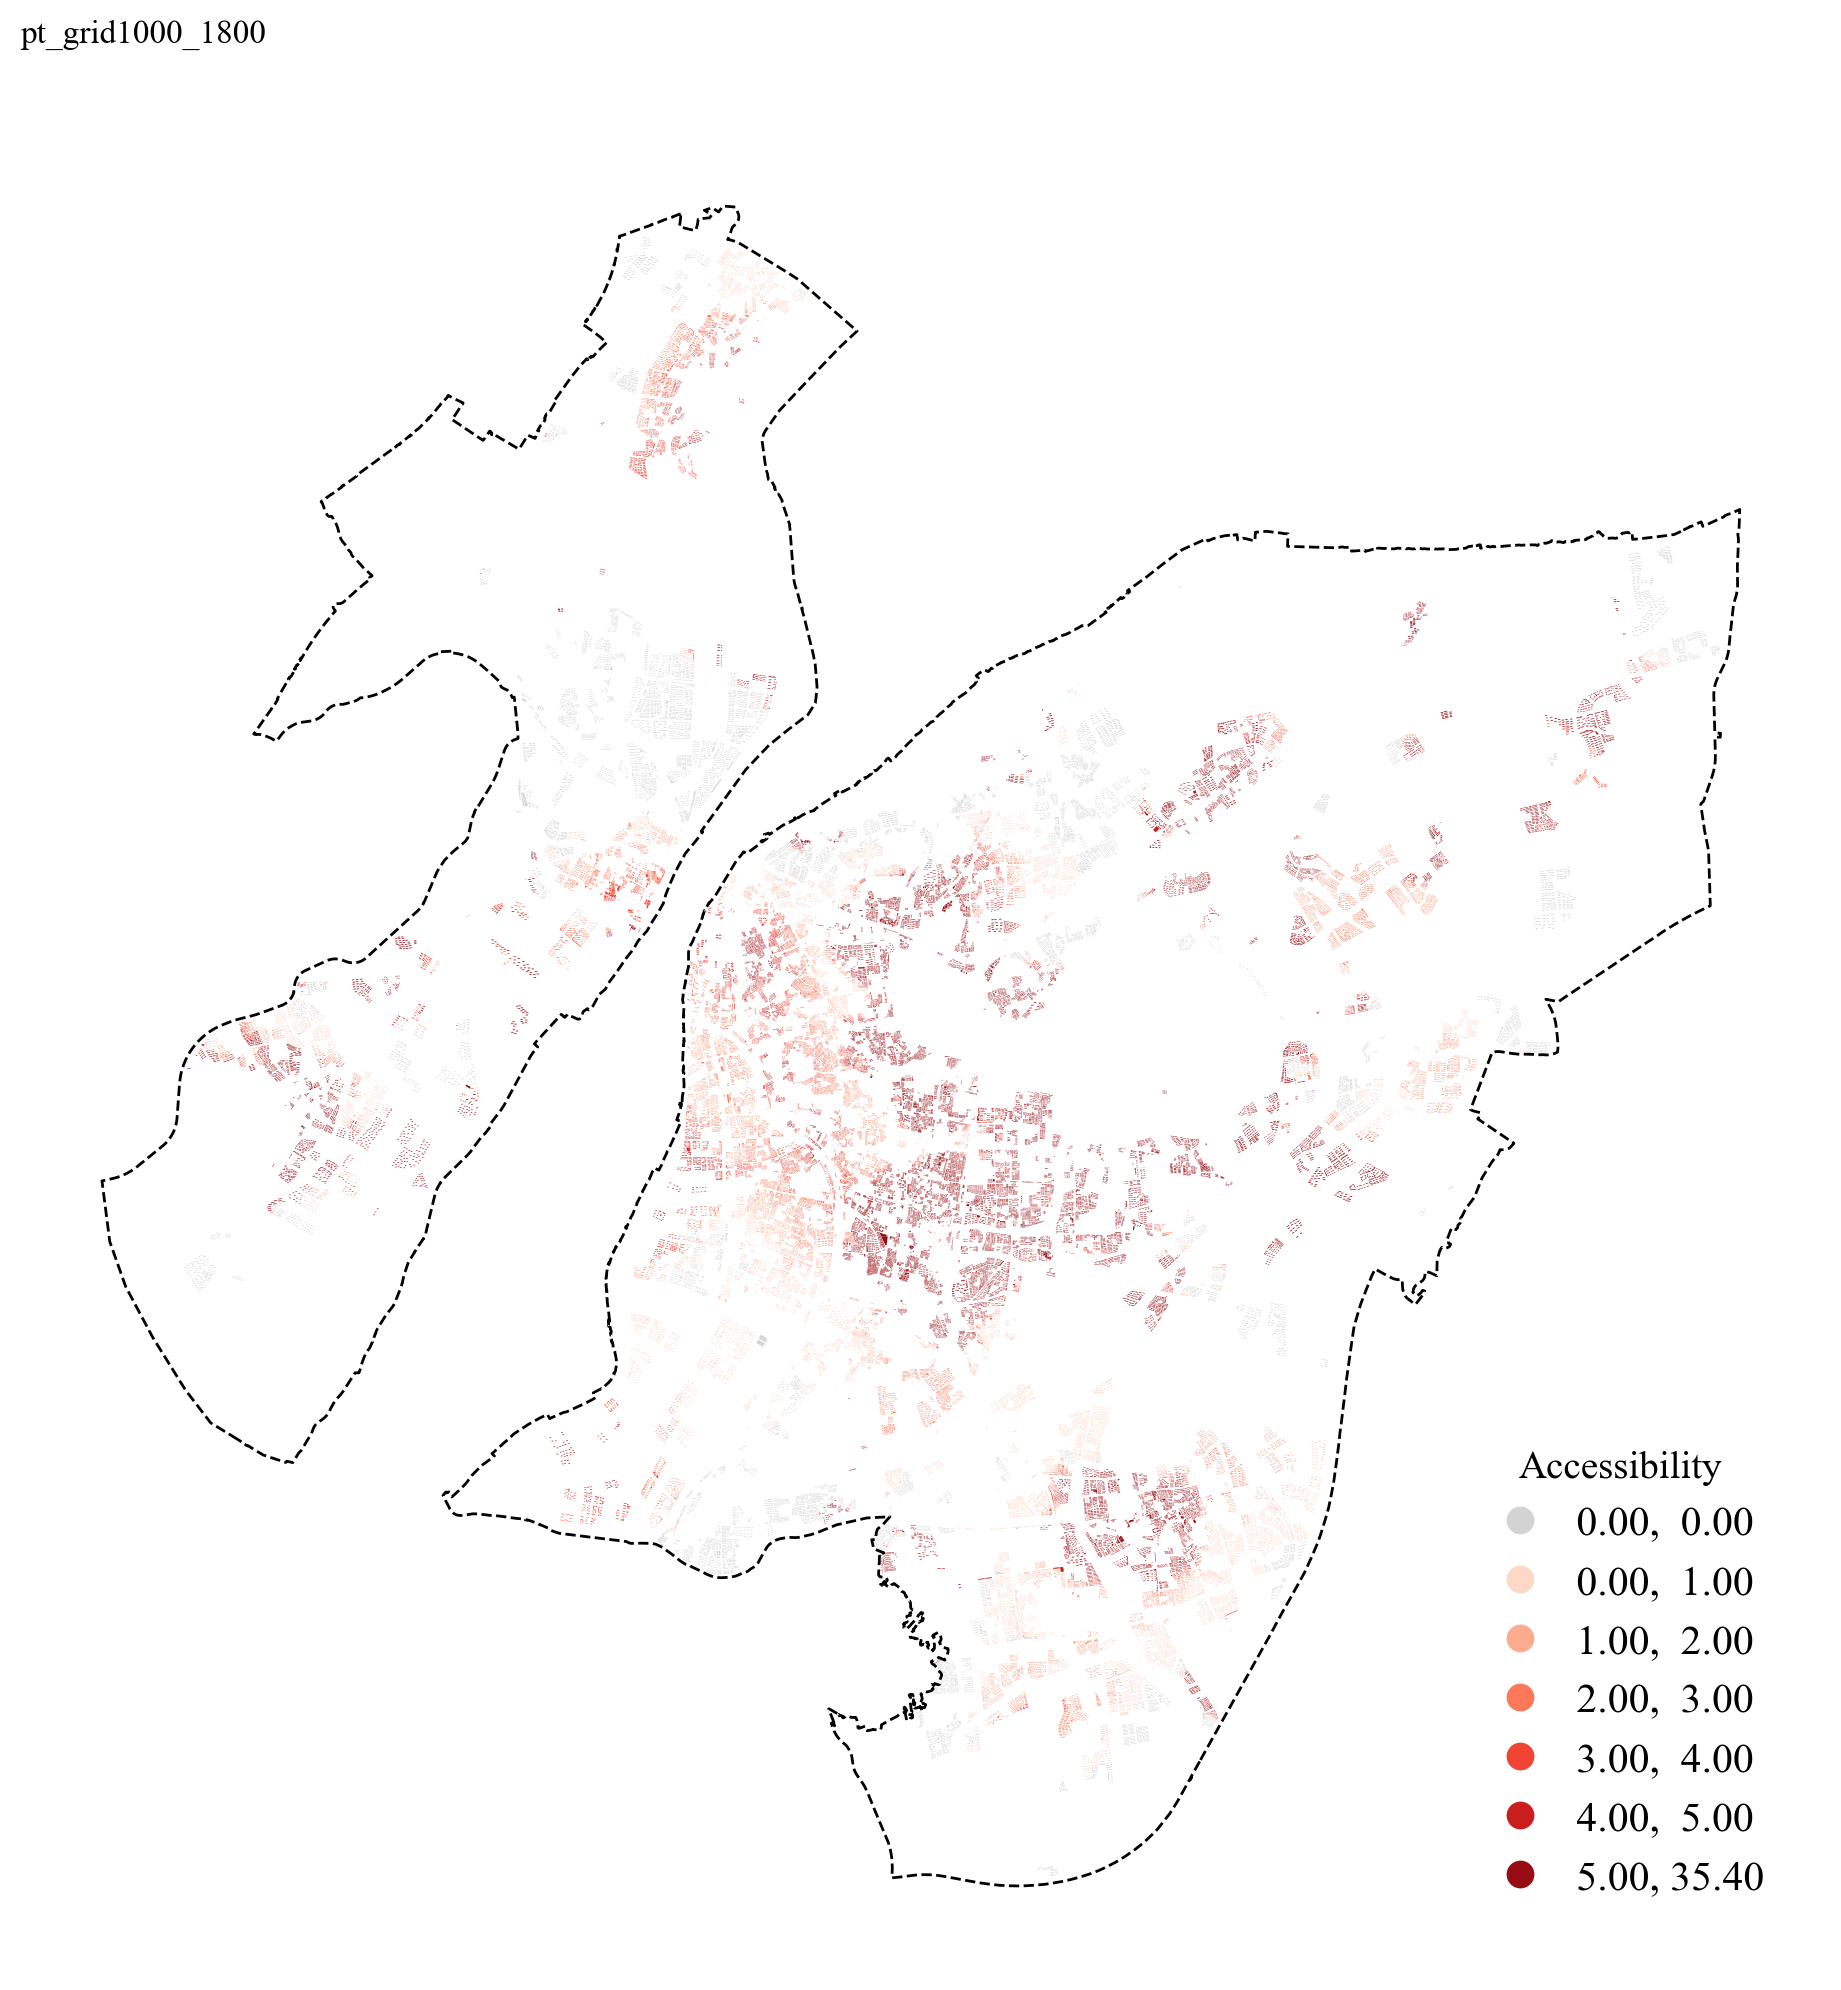

In [38]:
f, ax = plt.subplots(figsize=(12, 12))
dz_sl.plot(column='access_val', scheme="userdefined",
          edgecolor='none', cmap=cmap, ax=ax, legend=True, lw=0,
          legend_kwds={'loc': (0.8, 0.03), 'frameon': False, 'title': 'Accessibility',
                       'title_fontsize': 14,
                       'fontsize': 15, 'handletextpad': 0.1},
          classification_kwds={'bins': bins})

# parks.plot(ax=ax, color='green',alpha=0.8)

centerx2 = centerx.copy()
centerx2['geometry'] = centerx2['geometry'].buffer(0.008)
centerx2.plot(ax=ax, lw=0, facecolor='none')

# cx.add_basemap(ax, crs=centerx2.crs, alpha=0.3,
#                source=cx.providers.MapBox.Streets, zorder=0)

centerx.plot(ax=ax, facecolor='none', edgecolor='k', lw=1, zorder=12, ls='--')
ax.tick_params(axis='both', which='major', length=5, color='k',labelsize=20)
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))  # 这里设置间隔为0.1
# ax.xaxis.set_major_locator(plt.MultipleLocator(0.05))  # 这里设置间隔为0.1

# xlim, ylim = (118.55, 119.05), (31.82, 32.32)
# ax.set(xlim=xlim, ylim=ylim)
ax.set_axis_off()
name = f'{trans}_{grid}_od_{threshold}'
ax.set_title(f'{name}\n'.replace('od_',''), loc='left')

In [39]:
centerx2.unary_union.bounds

(1215433.9392155882, 3553270.155886722, 1256737.9665500564, 3595636.3816342787)

In [ ]:
"""
all plotting see：
A03a-plot-accessibility-distribution.py
A03b-plot-accessibility-distribution.py
"""